<a href="https://colab.research.google.com/github/anushriiyer/DSAIMiniProject/blob/main/Mini_Project_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [ ]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/NSDUH_2020_Tab.csv', low_memory=False)
data = data.drop(32893)
conditions = [
    (data['ABUSEPYHAL'] == 1),
    (data['ABUSEPYSED'] == 1),
    (data['ABUSEPYSTM'] == 1),
    (data['ABUSEPYPNR']== 1),
    (data['ABUSEALC'] == 1),
    (data['ABUSEHER'] == 1),
    (data['ABUSECOC'] == 1),
    (data['ABUSEMRJ'] == 1),
    (data['ABUSEPYHAL'] == 0) & (data['ABUSEPYSED'] == 0) & (data['ABUSEPYSTM'] == 0) & (data['ABUSEPYPNR']== 0) & (data['ABUSEALC'] == 0) & 
    (data['ABUSEHER'] == 0) & (data['ABUSECOC'] == 0) & (data['ABUSEMRJ'] == 0),]

# create a list of the values we want to assign for each condition
values = ['Hallucinogen', 'Sedatives', 'Stimulants', 'Pain Relievers', 'Alcohol', 'Heroin', 'Cocaine', 'Marijuana', 'None']

# create a new column and use np.select to assign values to it using our lists as arguments
data['TYPE'] = np.select(conditions, values)

In the above cell, we create a new categorical variable called **TYPE**, which combines eight different variables - **ABUSEPYHAL**, **ABUSEHER**, **ABUSEMRJ**, **ABUSEPYSED**, **ABUSEPYSTM**, **ABUSEALC**, **ABUSECOC** and **ABUSEPYPNR**. This new variable has nine categories - one for each of the above eight variables being equal to 1 and the ninth category is 'None' which includes respondents who have responded with a zero for all substances.

Alcohol           764
Marijuana         196
Hallucinogen       39
Pain Relievers     33
Cocaine            17
Stimulants         16
Heroin              8
Sedatives           7
Name: TYPE, dtype: int64


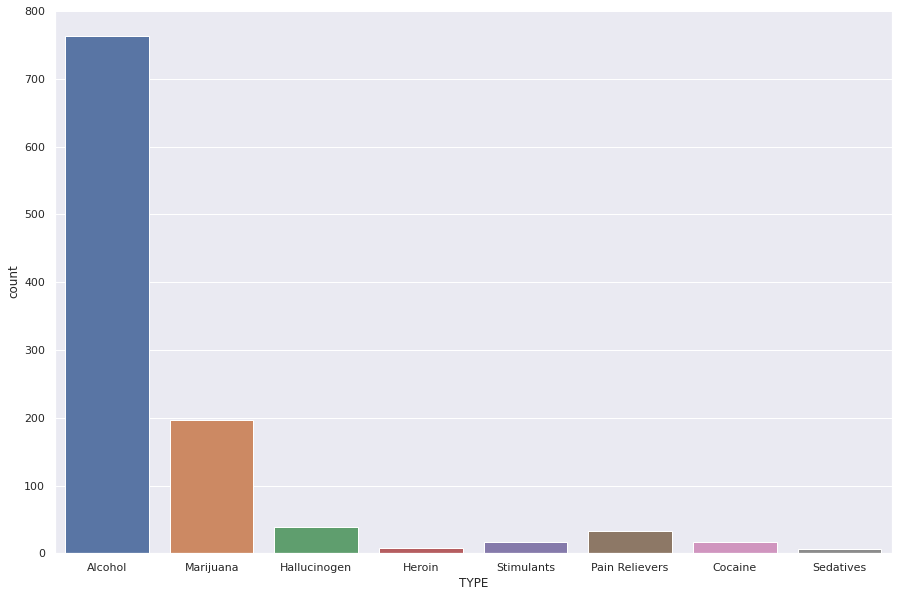

In [ ]:
drugdata = pd.DataFrame(data[["TYPE"]])
drugdata.drop(drugdata[drugdata['TYPE'] == 'None'].index, inplace = True)
print(drugdata["TYPE"].value_counts())
sb.countplot(x ='TYPE', data = drugdata)
#see the distribution of types
#None values removed to give a clearer graph and distribution of different types of substances abused
sb.set(rc = {'figure.figsize':(15,10)})


#### **CORRELATION BETWEEN MENTAL HEALTH AND SUBSTANCE ABUSE**

In [ ]:
data2 = pd.DataFrame(data[["ILLYR", "K6SCYR"]])
#Finding correlation between mental health and drug abuse

**ILLYR**: Any illicit drug - past year use
       
       0 - Did not use in past year
       1 - Used in past year

**K6SCYR**: Score with values ranging from 0 to 24 indicating the level of psychological distress during the worst month of the past year, that was not the past 30 days. This score variable is based on a series of six questions asking respondents how frequently they experienced the following symptoms of psychological distress:
1. feeling nervous
2. feeling hopeless
3. feeling fidgety
4. feeling so sad or depressed that nothing could cheer you up
5. feeling that everything was an effort
6. feeling down on yourself, no good or worthless

The coding format for each of these symptoms is as follows:
0. none of the time and other responses
1. a little of the time
2. some of the time
3. most of the time
4. all of the time

These values were summed up to get the total K6 score.

In [ ]:
data2.head()

,ILLYR,K6SCYR
0,0.0,NaN
1,0.0,17.0
2,0.0,NaN
3,0.0,NaN
4,0.0,NaN


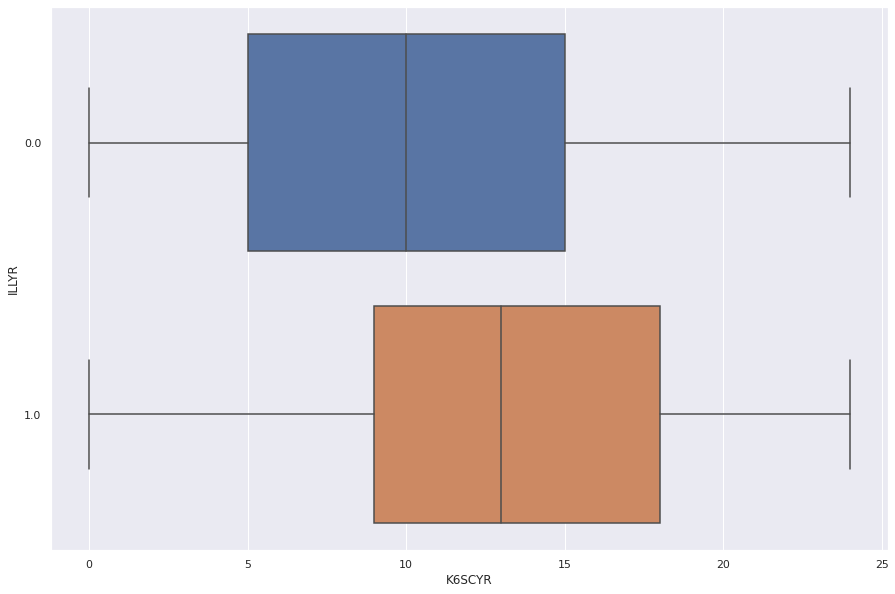

In [ ]:
sb.boxplot(x="K6SCYR", y="ILLYR", data=data2, orient = 'h')

**Insight:** The boxplot indicates that people who have used illicit drugs in the past year (ILLYR = 1) have a higher median K6 score (K6SCYR) as compared to people who have not used in the past year (ILLYR = 0). Thus, we can infer that long-term drug abuse is associated with worse mental health conditions.

#### **CORRELATION BETWEEN AGE, RACE AND DIFFERENT TYPES OF SUBSTANCE ABUSE**

In [ ]:
data3 = pd.DataFrame(data[["CATAG7", "NEWRACE2", "ABUSEPYHAL", "ABUSEHER", "ABUSEMRJ","ABUSEPYSED","ABUSEPYSTM","ABUSEALC","ABUSECOC","ABUSEPYPNR", "TYPE"]])
#Finding correlation between age, race and different types of drug abuse


The first two variables in this dataframe are factors we will be exploring to determine whether or not they affect susceptibility to drug abuse.

**CATAG7**: The age categories are as follows:
1. 12-13 years old
2. 14-15 years old
3. 16-17 years old
4. 18-20 years old
5. 21-25 years old
6. 26-34 years old
7. 35 years old and older

**NEWRACE2**: The race categories are as follows:

1. Non-Hispanic White
2. Non-Hispanic Black/African American
3. Non-Hispanic Native American/ AK Native
4. Non-Hispanic Native HI/ Other Pacific Islanders
5. Non-Hispanic Asian
6. Non-Hispanic more than one race
7. Hispanic

The following eight variables concern the different types of substance abuse. A respondent was defined as having hallucinogen, heroin, marijuana, sedative, stimulant, alcohol, cocaine or pain reliever abuse (**ABUSEPYHAL**, **ABUSEHER**, **ABUSEMRJ**, **ABUSEPYSED**, **ABUSEPYSTM**, **ABUSEALC**, **ABUSECOC**, **ABUSEPYPNR**) if they reported a positive response to one or more of the following four abuse criteria and was determined not to be dependent upon the substance of interest:

1. Respondent reported having serious problems due to substance use at home, work or school.
2. Respondent reported using substance regularly and then did something where substance use might have put them in physical danger.
3. Respondent reported substance use causing actions that repeatedly got them in trouble with the law.
4. Respondent reported having problems caused by substance use with family or friends and continued to use substance even though it was 
thought to be causing problems with family and friends. 

These variables are coded as follows:

      0 - No/Unknown
      1 - Yes

The last variable is **TYPE**, a combination of the above eight variables.

In [ ]:
data3.head()

,CATAG7,NEWRACE2,ABUSEPYHAL,ABUSEHER,ABUSEMRJ,ABUSEPYSED,ABUSEPYSTM,ABUSEALC,ABUSECOC,ABUSEPYPNR,TYPE
0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
1,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
2,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
3,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None


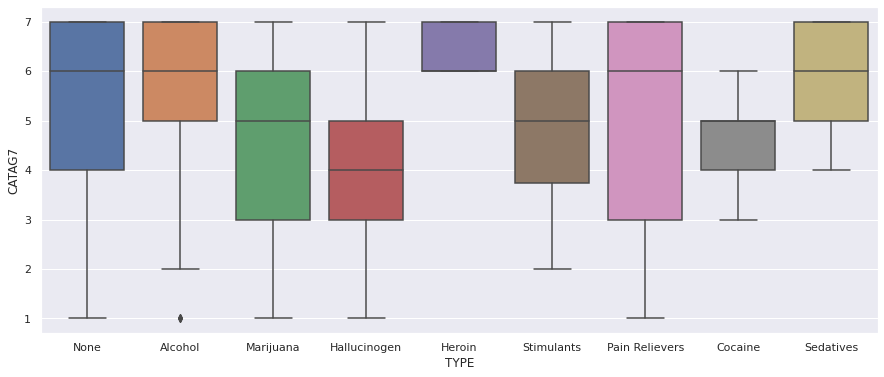

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(15, 6))
sb.boxplot(x = "TYPE", y = "CATAG7", data = data3)

We can derive the following information from these boxplots:

1. 12-15 year olds are much less prone to substance abuse.
2. Respondents aged 16 and older are more likely to be susceptible to substance abuse.


*   Hallucinogen abuse is the highest among 16-25 year olds.
*   Heroin abuse is the highest among 26+ year olds.
*   Marijuana abuse is the highest among 16-34 year olds.
*   Sedatives abuse is the highest among 21+ year olds.
*   Stimulant abuse is the highest among 16-34 year olds.
*   Pain reliever abuse is the highest among 16+ year olds.
*   Cocaine abuse is the highest among 18-34 year olds.
*   Alcohol abuse is the highest among 21+ year olds.



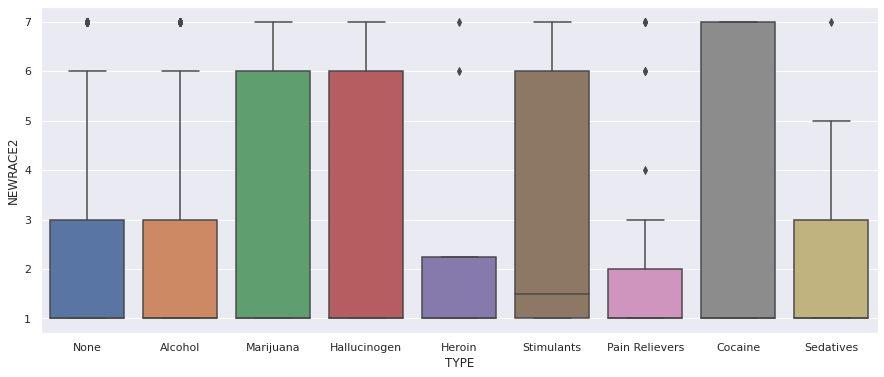

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(15, 6))
sb.boxplot(x = "TYPE", y = "NEWRACE2", data = data3)

We can derive the following information from the above boxplots:

1. Hispanic people are the least prone to substance abuse.
2. All other races are almost equally likely to use hallucinogens, marijuana, stimulants and cocaine.
3. Heroin abuse is most prevalent among non-Hispanic white and black people.
4. Sedative abuse is most prevalent among non-Hispanic white, black and native American people.
5. Pain reliever abuse is most prevalent among non-Hispanic white and black people.
6. Alcohol abuse is most prevalent among non-Hispanic white, black and native American people.

#### **CORRELATION BETWEEN EMPLOYMENT STATUS, FINANCIAL BACKGROUNDS AND DIFFERENT TYPES OF SUBSTANCE ABUSE**

In [ ]:
data4 = pd.DataFrame(data[["INCOME", "POVERTY3", "WRKSTATWK2", "ABUSEPYHAL", "ABUSEHER", "ABUSEMRJ","ABUSEPYSED","ABUSEPYSTM","ABUSEALC","ABUSECOC","ABUSEPYPNR", "TYPE"]])
#Finding correlation between employment status, financial backgrounds and different types of drug abuse

The first three variables in the above dataframe are factors we will be considering to determine whether or not they affevt susceptibility to drug abuse.

**INCOME**: The total family income (in US dollars) is coded as follows:

1. Less than 20,000
2. 20,000 - 49,999
3. 50,000 - 74,999
4. 75,000 or more

**POVERTY3**: POVERTY3 was created for each individual based on their poverty threshold (determined by their age, family size, the number of children in the household, and total family income). The poverty levels are categorised as follows:
1. Living in poverty
2. Income upto 2 x Federal Poverty Threshold
3. Income more than 2 x Federal Poverty Threshold

**WRKSTATWK2**: The work situation in past week categories are as follows:

1. Worked at full-time job, past week
2. Worked at part-time job, past week
3. Has job or volunteer worker, did not work past week
4. Unemployed/on layoff, looking for work
5. Disabled
6. Keeping house full-time
7. In school/training
8. Retired
9. Does not have a job some other reason

The following eight variables concern the different types of substance abuse. A respondent was defined as having hallucinogen, heroin, marijuana, sedative, stimulant, alcohol, cocaine or pain reliever abuse (**ABUSEPYHAL**, **ABUSEHER**, **ABUSEMRJ**, **ABUSEPYSED**, **ABUSEPYSTM**, **ABUSEALC**, **ABUSECOC**, **ABUSEPYPNR**) if they reported a positive response to one or more of the following four abuse criteria and was determined not to be dependent upon the substance of interest:

1. Respondent reported having serious problems due to substance use at home, work or school.
2. Respondent reported using substance regularly and then did something where substance use might have put them in physical danger.
3. Respondent reported substance use causing actions that repeatedly got them in trouble with the law.
4. Respondent reported having problems caused by substance use with family or friends and continued to use substance even though it was 
thought to be causing problems with family and friends. 

These variables are coded as follows:

      0 - No/Unknown
      1 - Yes

The last variable is **TYPE**, a combination of the above eight variables.

In [ ]:
data4.head()

,INCOME,POVERTY3,WRKSTATWK2,ABUSEPYHAL,ABUSEHER,ABUSEMRJ,ABUSEPYSED,ABUSEPYSTM,ABUSEALC,ABUSECOC,ABUSEPYPNR,TYPE
0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
1,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
2,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
3,4.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
4,4.0,3.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None


In [ ]:
data4.drop(data4[data4['WRKSTATWK2'] >9].index, inplace = True)

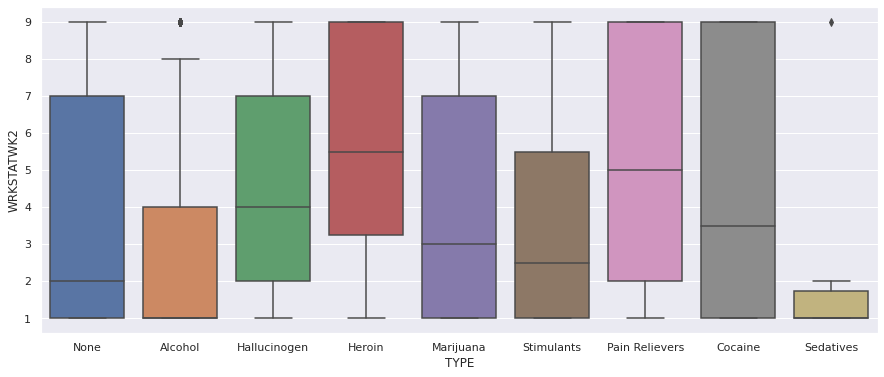

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(15, 6))
sb.boxplot(x = "TYPE", y = "WRKSTATWK2", data = data4)

We can derive the following information from the above boxplots:

1. Hallucinogen abuse is most prevalent among part-time working, volunteering, unemployed, disabled, full-time housekeeping and schooling/training respondents.
2. Heroin abuse is most prevalent among  volunteering, unemployed, disabled, full-time housekeeping, schooling/training and retired respondents.
3. Marijuana abuse is most prevalent among full-time working, part-time working, volunteering, unemployed, disabled, full-time housekeeping and schooling/training respondents.
4. Sedatives are most prevalent among full-time and part-time working respondents.
5. Stimulant abuse is most prevalent among full-time working, part-time working, volunteering, unemployed, disabled, full-time housekeeping and schooling/training respondents.
6. Pain reliever abuse is most prevalent among part-time working, volunteering, unemployed, disabled, full-time housekeeping, schooling/training and retired respondents.
7. Cocaine abuse is fairly distributed across all work situtations.
8. Alcohol abuse is most prevalent among full-time working, part-time working, volunteering and unemployed respondents.

In general, **work situation** is **not a good indicator** to predict susceptibility to substance abuse.

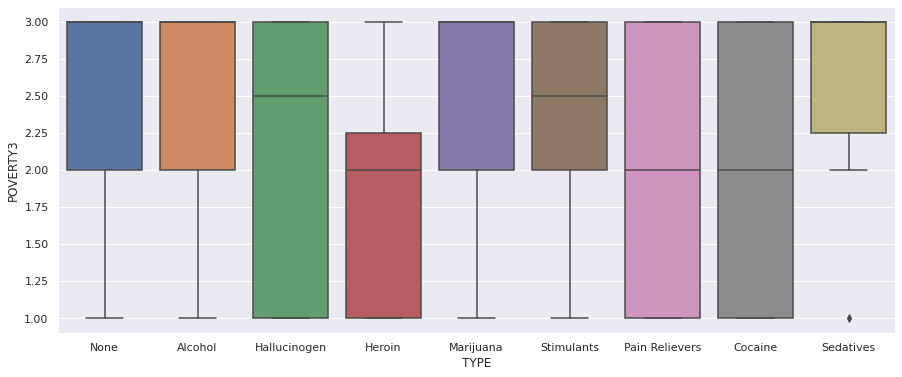

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(15, 6))
sb.boxplot(x = "TYPE", y = "POVERTY3", data = data4)

We can derive the following information from the above boxplots:

1. Hallucinogen, cocaine and pain reliever abuse is almost equally prevalent among all poverty levels.
2. Heroin is the only illicit drug not as prevalent among respondents with incomes over twice the poverty threshold.
3. Abuse of four out of the eight substances considered seems to be prevalent among people living in poverty. Abuse of seven of the eight substances considered seems to be prevalent among people with incomes above the poverty threshold. We can conclude that **substance abuse is fairly distributed among all income categories**.

#### **COMBINATIONS**

In [ ]:
data5 = pd.DataFrame(data[["INCOME", "POVERTY3", "CATAG7", "NEWRACE2", "K6SCYR","ILLYR", "ABUSEPYHAL", "ABUSEHER", "ABUSEMRJ","ABUSEPYSED","ABUSEPYSTM","ABUSEALC","ABUSECOC","ABUSEPYPNR"]])


The variables in this dataframe are a combination of those in dataframes data2, data3 and data4.

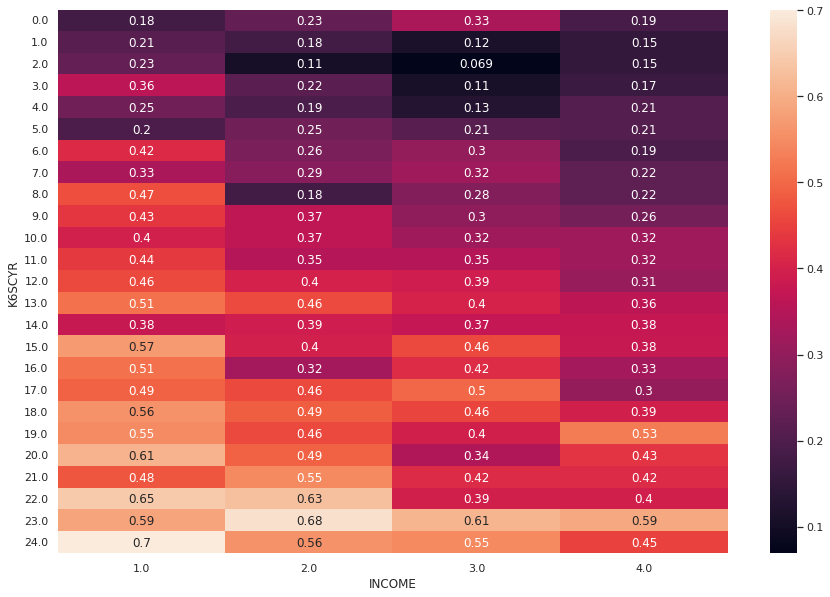

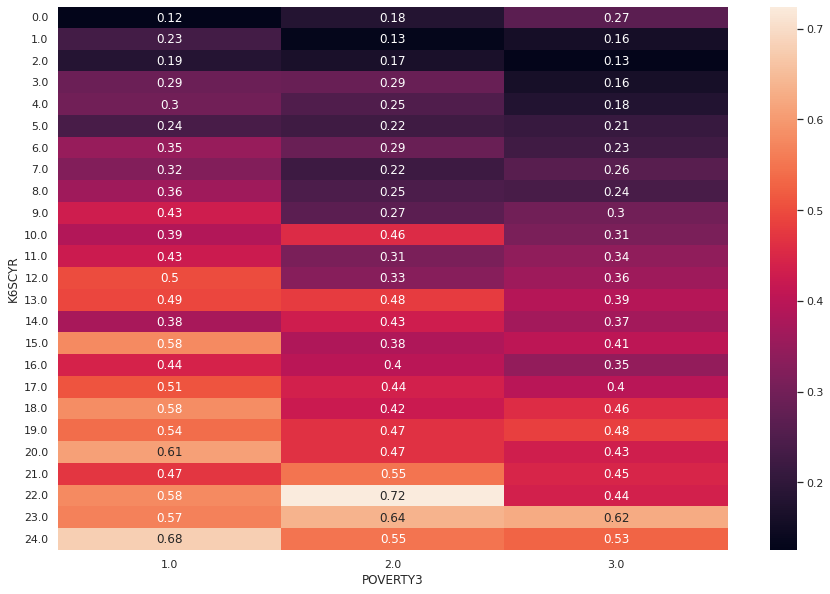

In [ ]:
data5_heatmap = data5.pivot_table(values='ILLYR',index='K6SCYR',columns='INCOME',aggfunc=np.mean)
sb.heatmap(data5_heatmap,annot=True)
plt.show()
data5_heatmap2 = data5.pivot_table(values='ILLYR',index='K6SCYR',columns='POVERTY3',aggfunc=np.mean)
sb.heatmap(data5_heatmap2,annot=True)
plt.show()
#Correlation between income/poverty level, mental health score and illicit drug abuse in the last year

Susceptibility to substance abuse seems to be higher for those with **higher levels of psychological distress**. It is **nearly equivalent** for people from **different income categories/poverty levels**.

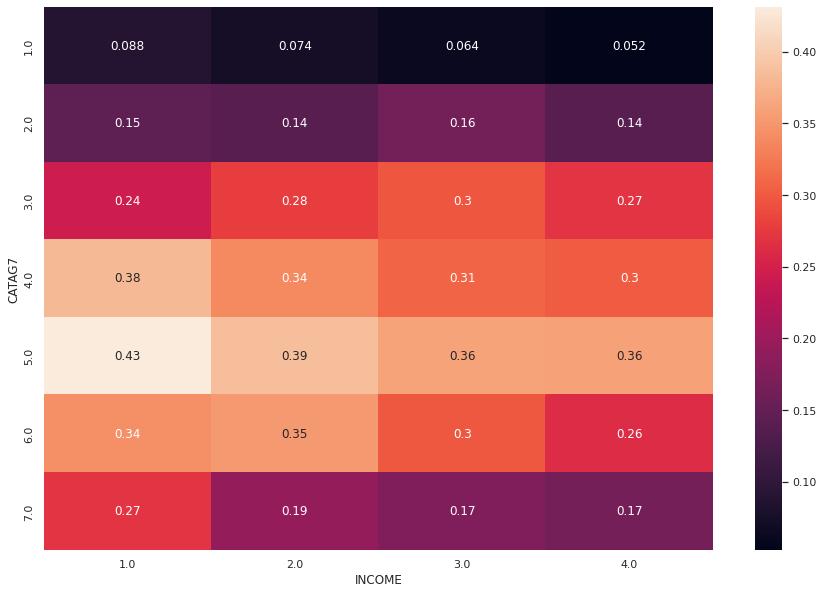

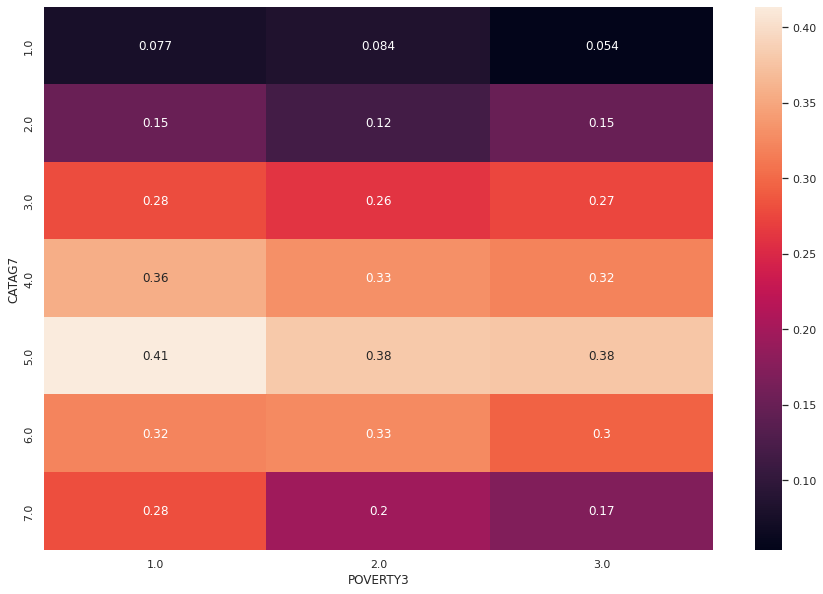

In [ ]:
data5_heatmap = data5.pivot_table(values='ILLYR',index='CATAG7',columns='INCOME',aggfunc=np.mean)
sb.heatmap(data5_heatmap,annot=True)
plt.show()
data5_heatmap2 = data5.pivot_table(values='ILLYR',index='CATAG7',columns='POVERTY3',aggfunc=np.mean)
sb.heatmap(data5_heatmap2,annot=True)
plt.show()
#correlation between income/poverty level, age and illicit drug abuse in the last year

Susceptibility to substance abuse seems to be **higher for those aged 18-25 years old**. It is **nearly equivalent** for people from **different income categories/poverty levels**.

Text(0.5, 1.0, 'Pain Reliever Abuse')

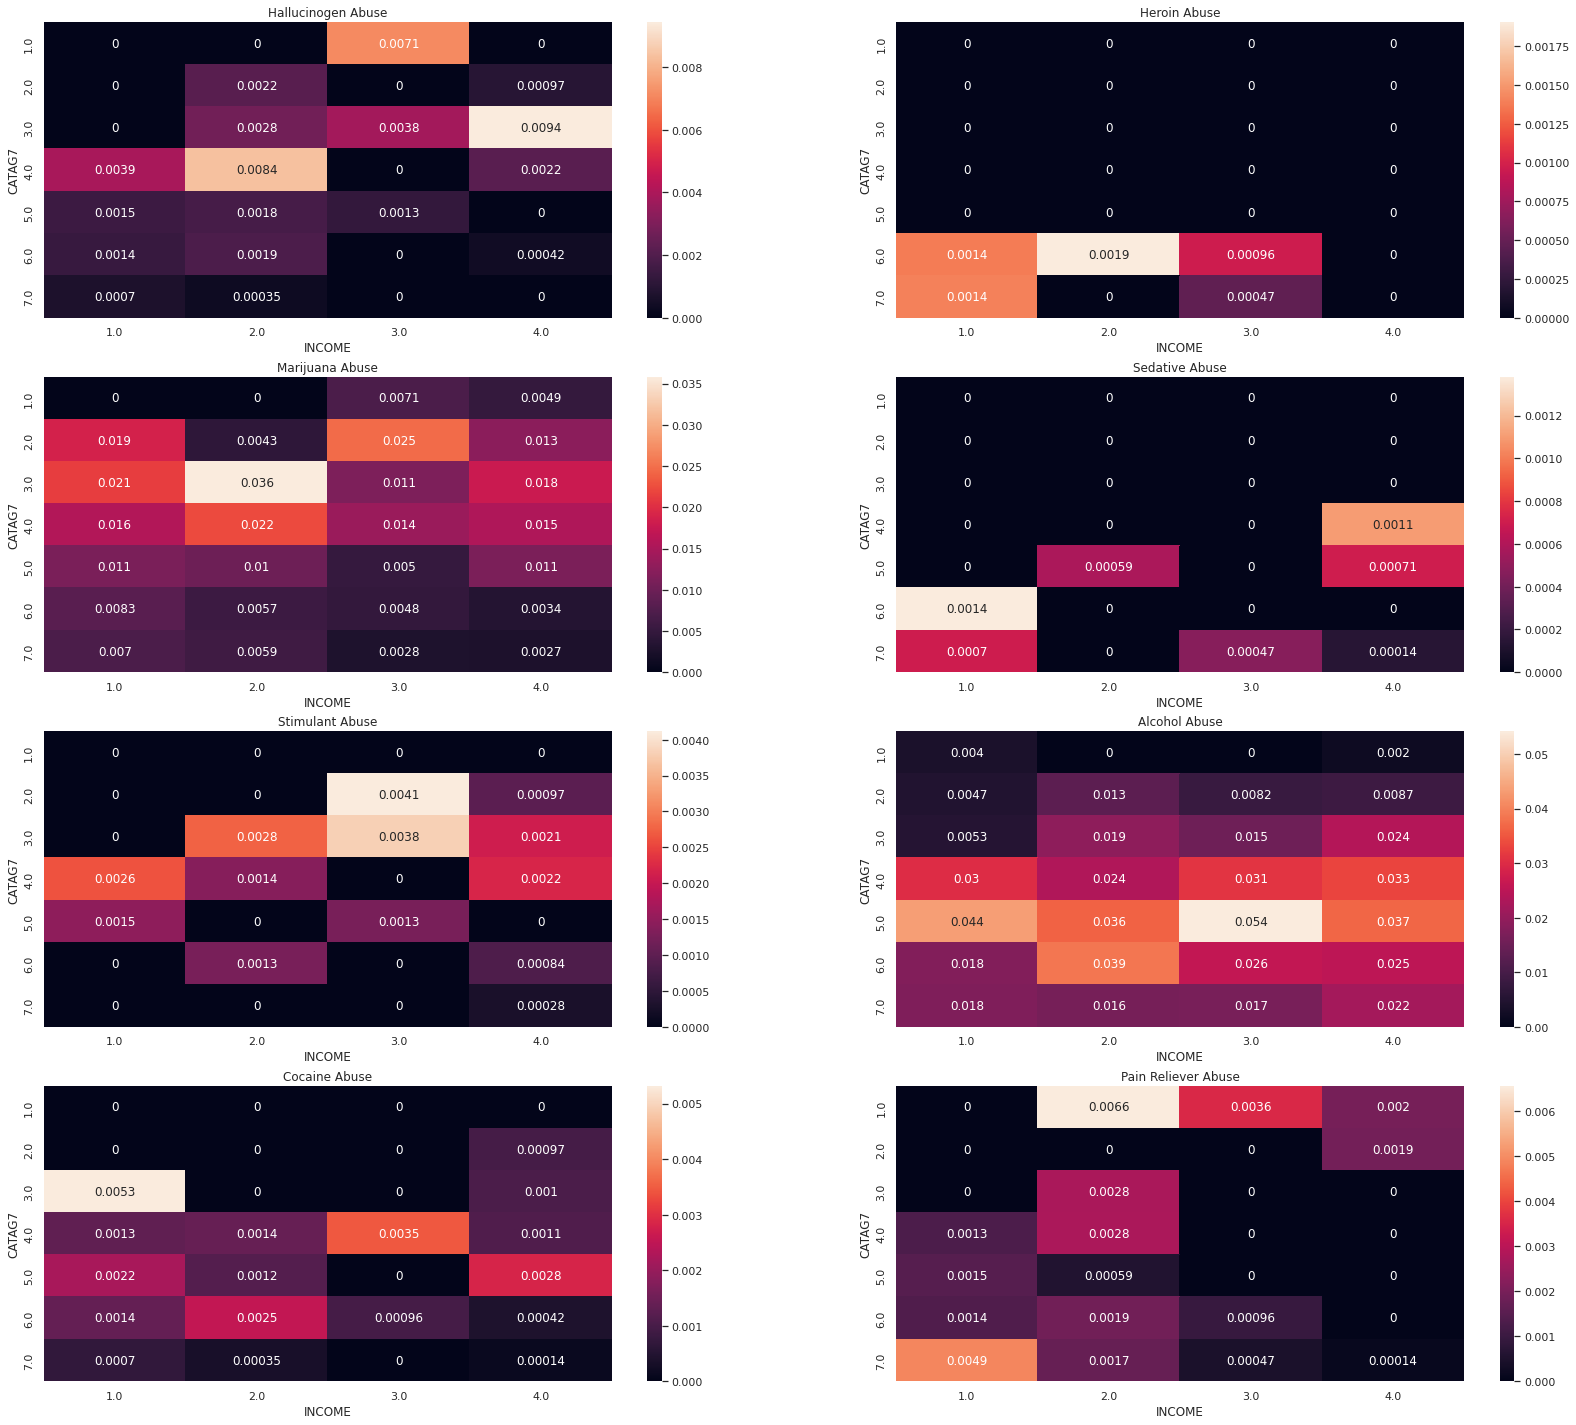

In [ ]:
f, axes = plt.subplots(4, 2, figsize=(28, 25))
data5_heatmap = data5.pivot_table(values='ABUSEPYHAL',index='CATAG7',columns='INCOME',aggfunc=np.mean, )
c1 = sb.heatmap(data5_heatmap,annot=True, ax = axes[0,0])
c1.set_title('Hallucinogen Abuse')

data5_heatmap = data5.pivot_table(values='ABUSEHER',index='CATAG7',columns='INCOME',aggfunc=np.mean, )
c2 = sb.heatmap(data5_heatmap,annot=True, ax = axes[0,1])
c2.set_title('Heroin Abuse')

data5_heatmap = data5.pivot_table(values='ABUSEMRJ',index='CATAG7',columns='INCOME',aggfunc=np.mean, )
c3 = sb.heatmap(data5_heatmap,annot=True, ax = axes[1,0])
c3.set_title('Marijuana Abuse')

data5_heatmap = data5.pivot_table(values='ABUSEPYSED',index='CATAG7',columns='INCOME',aggfunc=np.mean, )
c4 = sb.heatmap(data5_heatmap,annot=True, ax = axes[1,1])
c4.set_title('Sedative Abuse')

data5_heatmap = data5.pivot_table(values='ABUSEPYSTM',index='CATAG7',columns='INCOME',aggfunc=np.mean, )
c5 = sb.heatmap(data5_heatmap,annot=True, ax = axes[2,0]) 
c5.set_title('Stimulant Abuse')

data5_heatmap = data5.pivot_table(values='ABUSEALC',index='CATAG7',columns='INCOME',aggfunc=np.mean, )
c6 = sb.heatmap(data5_heatmap,annot=True, ax = axes[2,1])
c6.set_title('Alcohol Abuse')

data5_heatmap = data5.pivot_table(values='ABUSECOC',index='CATAG7',columns='INCOME',aggfunc=np.mean, )
c7 = sb.heatmap(data5_heatmap,annot=True, ax = axes[3,0])
c7.set_title('Cocaine Abuse')

data5_heatmap = data5.pivot_table(values='ABUSEPYPNR',index='CATAG7',columns='INCOME',aggfunc=np.mean, )
c8 = sb.heatmap(data5_heatmap,annot=True, ax = axes[3,1])
c8.set_title('Pain Reliever Abuse')

The spread of people who are susceptible to **marijuana abuse and alcohol abuse** is wider (**inclusive of a wider age range and more income groups**). However, the spread of people who are susceptible to **heroin abuse** is small (only those **aged 26 and above**).

Text(0.5, 1.0, 'Pain Reliever Abuse')

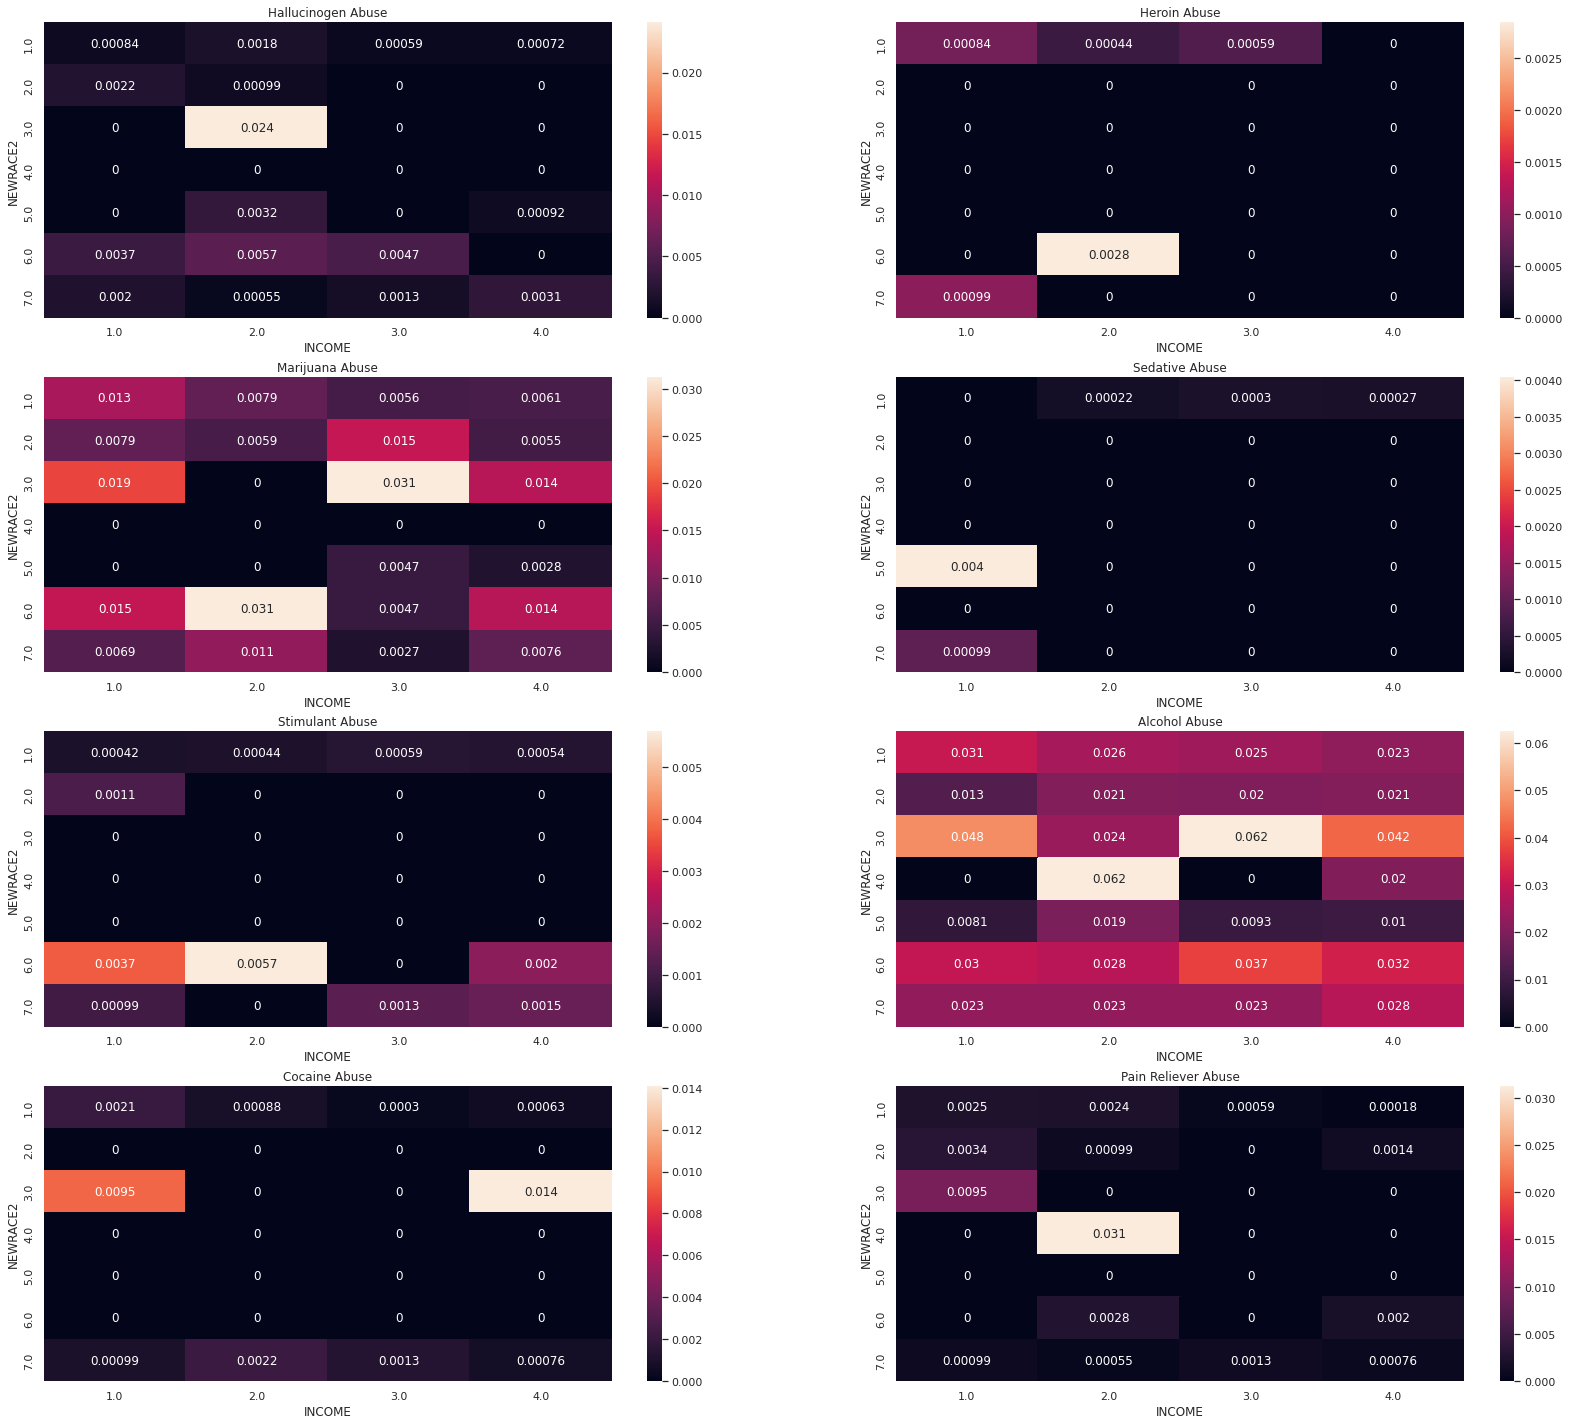

In [ ]:
f, axes = plt.subplots(4, 2, figsize=(28, 25))
data5_heatmap = data5.pivot_table(values='ABUSEPYHAL',index='NEWRACE2',columns='INCOME',aggfunc=np.mean, )
c1 = sb.heatmap(data5_heatmap,annot=True, ax = axes[0,0])
c1.set_title('Hallucinogen Abuse')

data5_heatmap = data5.pivot_table(values='ABUSEHER',index='NEWRACE2',columns='INCOME',aggfunc=np.mean, )
c2 = sb.heatmap(data5_heatmap,annot=True, ax = axes[0,1])
c2.set_title('Heroin Abuse')

data5_heatmap = data5.pivot_table(values='ABUSEMRJ',index='NEWRACE2',columns='INCOME',aggfunc=np.mean, )
c3 = sb.heatmap(data5_heatmap,annot=True, ax = axes[1,0])
c3.set_title('Marijuana Abuse')

data5_heatmap = data5.pivot_table(values='ABUSEPYSED',index='NEWRACE2',columns='INCOME',aggfunc=np.mean, )
c4 = sb.heatmap(data5_heatmap,annot=True, ax = axes[1,1])
c4.set_title('Sedative Abuse')

data5_heatmap = data5.pivot_table(values='ABUSEPYSTM',index='NEWRACE2',columns='INCOME',aggfunc=np.mean, )
c5 = sb.heatmap(data5_heatmap,annot=True, ax = axes[2,0]) 
c5.set_title('Stimulant Abuse')

data5_heatmap = data5.pivot_table(values='ABUSEALC',index='NEWRACE2',columns='INCOME',aggfunc=np.mean, )
c6 = sb.heatmap(data5_heatmap,annot=True, ax = axes[2,1])
c6.set_title('Alcohol Abuse')

data5_heatmap = data5.pivot_table(values='ABUSECOC',index='NEWRACE2',columns='INCOME',aggfunc=np.mean, )
c7 = sb.heatmap(data5_heatmap,annot=True, ax = axes[3,0])
c7.set_title('Cocaine Abuse')

data5_heatmap = data5.pivot_table(values='ABUSEPYPNR',index='NEWRACE2',columns='INCOME',aggfunc=np.mean, )
c8 = sb.heatmap(data5_heatmap,annot=True, ax = axes[3,1])
c8.set_title('Pain Reliever Abuse')